# Exam BAN436
## Candidates xxx, yyy & zzz

In this Jupyter Notebook, we will provide our answers to the home-exam for BAN436

## Packages
The following are necessary packages to import for this program to run properly

In [133]:
# Importing necessary packages for the exam
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar as cl
import datetime as dt

# Task 1 - Current CPI Growth

In [36]:
# Storing the url provided
url_t1 = 'https://data.ssb.no/api/v0/dataset/1088.csv?lang=en'

# Importing data
cpi_2m = pd.read_csv(url_t1)

# Checking data
cpi_2m 

,consumption group,month,contents,"03013: Consumer Price Index, by consumption group, month and contents"
0,TOTAL All-item index,2022M11,Consumer Price Index (2015=100),125.8
1,TOTAL All-item index,2022M11,Monthly change (per cent),-0.2
2,TOTAL All-item index,2022M11,12-month rate (per cent),6.5
3,TOTAL All-item index,2022M12,Consumer Price Index (2015=100),125.9
4,TOTAL All-item index,2022M12,Monthly change (per cent),0.1
5,TOTAL All-item index,2022M12,12-month rate (per cent),5.9


In [37]:
# Dropping unnecessary rows and formatting the data
cpi_2m = cpi_2m.drop('consumption group', axis = 1).copy()

# Renaming
cpi_2m = cpi_2m.rename(columns = {'03013: Consumer Price Index, by consumption group, month and contents' : 'CPI'}).copy()

In [38]:
# Getting most recent 12-month rate (percent)
recent_12mr = cpi_2m['CPI'][5]

# Period for estimated inflation
period = cpi_2m['month'][3]

# Current year checked
current_year = int(period.split('M')[0])

# Current month checked
current_month = int(period.split('M')[1])

# Period we have checked inflation-change
period = str(cl.month_name[current_month]) + ' ' + str(current_year - 1) + ' - ' + str(cl.month_name[current_month]) + ' ' + str(current_year)

In [39]:
# Print-statement
print("Change-rate for CPI: " + str(recent_12mr) + '%')
print(period)

Change-rate for CPI: 5.9%
December 2021 - December 2022


# Task 2 - CPI versus CPI-ATE

In this task, we have been given data-files. We aim to re-create a line-plot similar to the figure in the article on price growth

In [115]:
# Importing the data
cpi_df = pd.read_excel('data/monthly_cpi.xlsx', skiprows = 2)
cpi_ate_df = pd.read_excel('data/monthly_cpi_ate.xlsx', skiprows = 2)

In [116]:
# Checking cpi_df
cpi_df

,Unnamed: 0,Consumer Price Index (2015=100)
0,1979M01,25.3
1,1979M02,25.4
2,1979M03,25.5
3,1979M04,25.6
4,1979M05,25.7
...,...,...
566,Database:,NaN
567,External PROD,NaN
568,NaN,NaN
569,Internal reference code:,NaN


In [117]:
# ... and cpi_ate_df
cpi_ate_df

,Unnamed: 0,Unnamed: 1,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=100). Monthly
0,CPI-ATE All-item index,1995M01,..
1,NaN,1995M02,..
2,NaN,1995M03,..
3,NaN,1995M04,..
4,NaN,1995M05,..
...,...,...,...
375,Database:,NaN,NaN
376,External PROD,NaN,NaN
377,NaN,NaN,NaN
378,Internal reference code:,NaN,NaN


In [118]:
# I use the drop-operator to filter out the data from 2020M11 to 2022M11
cpi_df.drop(index=cpi_df.index[:287], axis=0, inplace = True)
cpi_ate_df.drop(index=cpi_ate_df.index[:95], axis=0, inplace = True)

In [119]:
# Resetting index and removing column
cpi_df = cpi_df.reset_index().drop('index', axis = 1).copy()
cpi_ate_df = cpi_ate_df.reset_index().drop('index', axis = 1).copy()

In [120]:
# Checking data
cpi_df

,Unnamed: 0,Consumer Price Index (2015=100)
0,2002M12,80.0
1,2003M01,81.9
2,2003M02,82.0
3,2003M03,81.4
4,2003M04,80.8
...,...,...
279,Database:,NaN
280,External PROD,NaN
281,NaN,NaN
282,Internal reference code:,NaN


In [121]:
cpi_ate_df

,Unnamed: 0,Unnamed: 1,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=100). Monthly
0,NaN,2002M12,82.4
1,NaN,2003M01,82.3
2,NaN,2003M02,82.7
3,NaN,2003M03,82.7
4,NaN,2003M04,83
...,...,...,...
280,Database:,NaN,NaN
281,External PROD,NaN,NaN
282,NaN,NaN,NaN
283,Internal reference code:,NaN,NaN


In [122]:
# Dropping last unnecessary rows
cpi_df.drop(cpi_df.tail(44).index, inplace = True)
cpi_ate_df.drop(cpi_ate_df.tail(45).index, inplace = True)

In [123]:
# Checking data again
cpi_df.tail()

,Unnamed: 0,Consumer Price Index (2015=100)
235,2022M07,124.2
236,2022M08,123.9
237,2022M09,125.6
238,2022M10,126.0
239,2022M11,125.8


In [124]:
cpi_ate_df.tail()

,Unnamed: 0,Unnamed: 1,CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=100). Monthly
235,NaN,2022M07,119.6
236,NaN,2022M08,119
237,NaN,2022M09,120.2
238,NaN,2022M10,120.6
239,NaN,2022M11,120.5


Now that we have the right amount of rows in both the dataframes, I can format them even more nicely and start thinking about making a plot

In [127]:
# Renaming columns of cpi_df
cpi_df.rename(columns = {'Unnamed: 0' : 'Month', 'Consumer Price Index (2015=100)' : 'CPI (2015 = 100)'}, inplace = True)

# Removing NaN-column and renaming other columns of cpi_ate_df
cpi_ate_df.drop('Unnamed: 0', axis = 1, inplace = True)
cpi_ate_df.rename(columns = {'Unnamed: 1' : 'Month', 'CPI-AT and CPI-ATE. CPI-AE and CPI-AEL (2015=100). Monthly' : 'CPI-ATE (2015 = 100)'}, inplace = True)

In [ ]:
# Converting month-columns to datetime

In [128]:
# Checking data again
cpi_df

,Month,CPI (2015 = 100)
0,2002M12,80.0
1,2003M01,81.9
2,2003M02,82.0
3,2003M03,81.4
4,2003M04,80.8
...,...,...
235,2022M07,124.2
236,2022M08,123.9
237,2022M09,125.6
238,2022M10,126.0


In [129]:
cpi_ate_df

,Month,CPI-ATE (2015 = 100)
0,2002M12,82.4
1,2003M01,82.3
2,2003M02,82.7
3,2003M03,82.7
4,2003M04,83
...,...,...
235,2022M07,119.6
236,2022M08,119
237,2022M09,120.2
238,2022M10,120.6


The problem with the month-columns are that they are poorly formatted for converting to datetime. I will

In [ ]:
# Amount of months
month_am = 25

# Datetime
datetime_lst = []

# Create a list of datetimes
for i in range(26):
    if i == 0:
        print('')
    elif (i > 0) & (i <= 2):
        datetime_lst.append(
            dt.datetime(2020, 10 + i, 1, 1, 1))
    elif (i > 2) & (i <= 14):
        datetime_lst.append(
            dt.datetime(2021, i - 2, 1, 1, 1))
    else:
        datetime_lst.append(
            dt.datetime(2022, i - 14, 1, 1, 1))

## Plotting
The following is the code needed for creating a line-plot of CPI and CPI-ATE from november 2020 to november 2022

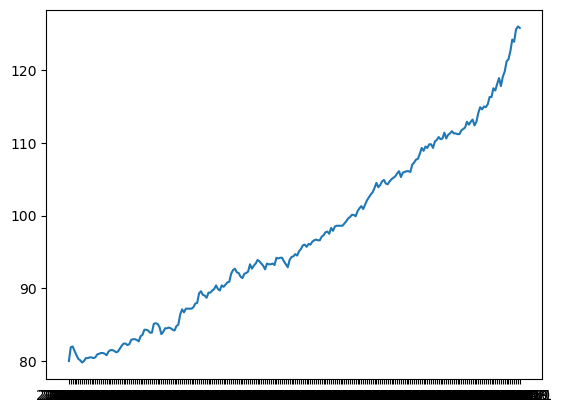

In [132]:
# Creating figure and ax-objects
fig, ax = plt.subplots()

# Plot cpi_df
ax.plot(cpi_df['Month'], 
       cpi_df['CPI (2015 = 100)'])

In [135]:
dt.datetime(2020, 11, 1, 1, 1)

datetime.datetime(2020, 11, 1, 1, 1)

In [148]:
datetime_lst

[datetime.datetime(2020, 11, 1, 1, 1),
 datetime.datetime(2020, 12, 1, 1, 1),
 datetime.datetime(2021, 1, 1, 1, 1),
 datetime.datetime(2021, 2, 1, 1, 1),
 datetime.datetime(2021, 3, 1, 1, 1),
 datetime.datetime(2021, 4, 1, 1, 1),
 datetime.datetime(2021, 5, 1, 1, 1),
 datetime.datetime(2021, 6, 1, 1, 1),
 datetime.datetime(2021, 7, 1, 1, 1),
 datetime.datetime(2021, 8, 1, 1, 1),
 datetime.datetime(2021, 9, 1, 1, 1),
 datetime.datetime(2021, 10, 1, 1, 1),
 datetime.datetime(2021, 11, 1, 1, 1),
 datetime.datetime(2021, 12, 1, 1, 1),
 datetime.datetime(2022, 1, 1, 1, 1),
 datetime.datetime(2022, 2, 1, 1, 1),
 datetime.datetime(2022, 3, 1, 1, 1),
 datetime.datetime(2022, 4, 1, 1, 1),
 datetime.datetime(2022, 5, 1, 1, 1),
 datetime.datetime(2022, 6, 1, 1, 1),
 datetime.datetime(2022, 7, 1, 1, 1),
 datetime.datetime(2022, 8, 1, 1, 1),
 datetime.datetime(2022, 9, 1, 1, 1),
 datetime.datetime(2022, 10, 1, 1, 1),
 datetime.datetime(2022, 11, 1, 1, 1)]